<a href="https://colab.research.google.com/github/gnana70/Machine-learning-projects/blob/master/mail_generate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Bidirectional, Dropout, LSTM, Dense, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [0]:
def preprocess_data(text_file_path):
  data = open(text_file_path).read()

  corpus = data.lower().split("\n")

  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  total_words = len(tokenizer.word_index) + 1

  # create input sequences using list of tokens
  input_sequences = []
  for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
      n_gram_sequence = token_list[:i+1]
      input_sequences.append(n_gram_sequence)


  # pad sequences 
  max_sequence_len = max([len(x) for x in input_sequences])
  input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

  # create predictors and label
  predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

  label = ku.to_categorical(label, num_classes=total_words)

  return predictors, label,max_sequence_len,total_words,tokenizer

In [32]:
import os

complete_text = ''
for text_file in os.listdir('/content/drive/My Drive/resignation_mail'):
  file_name = '/content/drive/My Drive/resignation_mail/'+text_file
  with open(file_name,'r') as txt:
    content = txt.read()
    complete_text = complete_text + content + '\n\n'

print(complete_text)

with open('/content/drive/My Drive/resignation_mail/merged.txt','w') as output:
  output.write(complete_text)

Hi All,

 

I would like to thank everyone for helping me to grow as the person who I am now. It’s been pleasure and enjoyable experience working with all of you 😊

 

I am happy that I had a good time with you all for a period of 3 years 4 months 9 days and the lessons and memories are the ones I carry from here.

 

Please feel free to contact me or ping me over whenever possible for a small chit chat. 😃

 

Finally I bid good bye and best wishes to all of you.

 

Regards,

Gnana Prasath

Email-id: gnana70@gmail.com

Phone: +91-9442306742

Hi All,


Today is my last day after a wonderful year with Schlumberger(iDistrict). As I move on, I would like to take a moment to remember and cherish our times together. It’s been great interacting and knowing each one of you. Even though I will miss you all here I am looking forward to this new challenge and to start a new phase of my career.

 

I would like to sincerely thank each of you for every experience shared, opportunity offered, and g

In [0]:
def create_model(max_sequence_len,total_words):
    model = Sequential()
    model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
    model.add(Bidirectional(LSTM(150, return_sequences = True)))
    model.add(Bidirectional(LSTM(150, return_sequences = True)))
    model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(total_words, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())

    return model

In [46]:
predictors, label,max_sequence_len,total_words,tokenizer = preprocess_data('/content/drive/My Drive/resignation_mail/merged.txt')
val_predictors, val_label,_,_,_ = preprocess_data('/content/drive/My Drive/resignation_mail/18.txt')
model = create_model(max_sequence_len,total_words)



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 157, 100)          67500     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 157, 300)          301200    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 157, 300)          541200    
_________________________________________________________________
dropout_4 (Dropout)          (None, 157, 300)          0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_8 (Dense)              (None, 337)               34037     
_________________________________________________________________
dense_9 (Dense)              (None, 675)              

In [47]:
history = model.fit(predictors, label, epochs=40, verbose=1)

Epoch 1/40
351/351 [==============================] - 24s 69ms/step - loss: 5.7568 - accuracy: 0.0359
Epoch 2/40
351/351 [==============================] - 24s 68ms/step - loss: 5.0305 - accuracy: 0.0523
Epoch 3/40
351/351 [==============================] - 24s 69ms/step - loss: 4.6950 - accuracy: 0.0789
Epoch 4/40
351/351 [==============================] - 24s 68ms/step - loss: 4.4474 - accuracy: 0.1079
Epoch 5/40
351/351 [==============================] - 24s 69ms/step - loss: 4.2465 - accuracy: 0.1312
Epoch 6/40
351/351 [==============================] - 24s 68ms/step - loss: 4.0558 - accuracy: 0.1514
Epoch 7/40
351/351 [==============================] - 24s 68ms/step - loss: 3.8849 - accuracy: 0.1709
Epoch 8/40
351/351 [==============================] - 24s 68ms/step - loss: 3.6997 - accuracy: 0.2040
Epoch 9/40
351/351 [==============================] - 24s 69ms/step - loss: 3.5224 - accuracy: 0.2465
Epoch 10/40
351/351 [==============================] - 24s 68ms/step - loss: 3.356

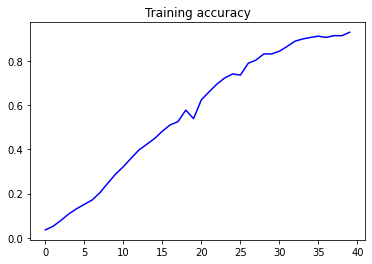

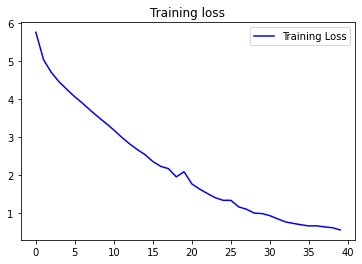

In [48]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [55]:
seed_text = "Dear All,\n"
next_words = 107
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  # predicted = model.predict_classes(token_list, verbose=0)
  predicted = np.argmax(model.predict(token_list), axis=-1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

Dear All,
 a big thanks to all my project managers and my colleagues for their support and guidance to excel in my career and a very big thanks to all my friends with whom i have spent the sweet and memorable moments that would last for a lifetime my point of how headed as i move on i would like to take a moment to remember and cherish our times together it’s been great interacting and knowing each one of you even though i will miss you all here i am looking forward to this new challenge and to start a new phase of my career leaving this team


In [28]:
# saving and loading the model
model.save('/content/mail_model')

# loading the model

new_model = tf.keras.models.load_model('/content/mail_model')

new_model.summary()

INFO:tensorflow:Assets written to: /content/mail_model/assets
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 157, 100)          67500     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 157, 300)          301200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 157, 300)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_4 (Dense)              (None, 337)               34037     
_________________________________________________________________
dense_5 (Dense)              (None, 675)               228150    
Total params: 791,287
Trainable params: 791,287
Non-traina

In [29]:
seed_text = "Hi All,"
next_words = 100
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  # predicted = model.predict_classes(token_list, verbose=0)
  predicted = np.argmax(new_model.predict(token_list), axis=-1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

Hi All, to say goodbye with touch and all the best for this things i will meet the best as challenging and if me to leave you all and a wonderful journey and a new phase of my career i am looking forward to this new challenge and to start a new phase of my career i am reachable at my personal email and phone number feel free to to meet the wonderful organization for past three years and a new phase of my career i am looking forward to this new challenge and to start a new phase of my career
